In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def drawimg(image, title="image"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title+str(image.shape))
    plt.style.use("seaborn")
    plt.show()

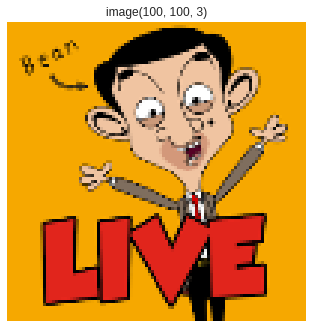

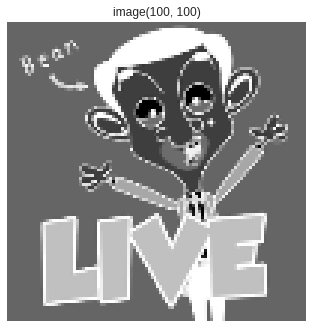

In [8]:
img = cv2.imread("images.png")
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#BGR to RGB
img_ = cv2.resize(img_, (100, 100))
gray_img = cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)
drawimg(img_)
drawimg(gray_img)

In [12]:
def convolutional(img, img_filter):
    
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    
    new_img = np.zeros((W-F+1, H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    
    drawimg(new_img)

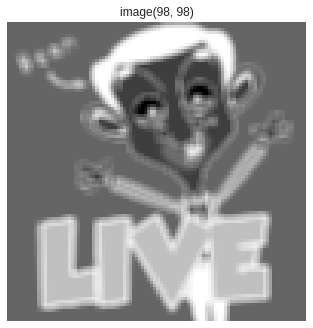

In [15]:
# Blur Filter
blur_filter = np.ones((3, 3))/9
convolutional(gray_img, blur_filter)

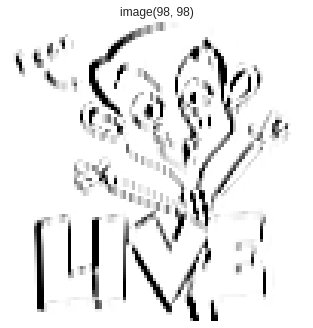

In [16]:
# Edge Filter
edge_filter = np.array([[1, 0, -1], 
                       [1, 0, -1],
                       [1, 0, -1]])
convolutional(gray_img, edge_filter)